# Classification and Regression, Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

### Tabular

#### Classification

In [2]:
from sklearn.datasets import load_wine

In [3]:
X_wine, y_wine = load_wine(return_X_y=True)
X_wine.shape, y_wine.shape

((178, 13), (178,))

In [4]:
np.unique(y_wine, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

#### Regression

In [5]:
from sklearn.datasets import load_diabetes

In [6]:
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
X_diabetes.shape, y_diabetes.shape

((442, 10), (442,))

### Time series

#### Classification

In [7]:
from sktime.datasets import load_gunpoint

In [8]:
X_gunpoint, y_gunpoint = load_gunpoint(return_X_y=True, return_type="numpy3D")
X_gunpoint.shape, y_gunpoint.shape

((200, 1, 150), (200,))

In [9]:
np.unique(y_gunpoint, return_counts=True)

(array(['1', '2'], dtype='<U1'), array([100, 100]))

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
y_gunpoint = le.fit_transform(y_gunpoint)

In [12]:
np.unique(y_gunpoint, return_counts=True)

(array([0, 1]), array([100, 100]))

#### Regression

In [13]:
X_covid = np.load("data/X_covid.npy")
y_covid = np.load("data/y_covid.npy")
X_covid.shape, y_covid.shape

((201, 1, 84), (201,))

## Split the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, random_state=0, stratify=y_wine)
X_train_wine.shape, X_test_wine.shape, y_train_wine.shape, y_test_wine.shape

((133, 13), (45, 13), (133,), (45,))

In [16]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, random_state=0)
X_train_diabetes.shape, X_test_diabetes.shape, y_train_diabetes.shape, y_test_diabetes.shape

((331, 10), (111, 10), (331,), (111,))

In [17]:
X_gunpoint_train, X_gunpoint_test, y_gunpoint_train, y_gunpoint_test = train_test_split(X_gunpoint, y_gunpoint, random_state=0)
X_gunpoint_train.shape, X_gunpoint_test.shape, y_gunpoint_train.shape, y_gunpoint_test.shape

((150, 1, 150), (50, 1, 150), (150,), (50,))

In [18]:
X_train_covid, X_test_covid, y_train_covid, y_test_covid = train_test_split(X_covid, y_covid, random_state=0)
X_train_covid.shape, X_test_covid.shape, y_train_covid.shape, y_test_covid.shape

((150, 1, 84), (51, 1, 84), (150,), (51,))

## Instance-based (Tabular and Time Series)

### Tabular Multi-class Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train_wine, y_train_wine)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn.predict(X_test_wine)

In [23]:
y_pred_scores = knn.predict_proba(X_test_wine)

#### Evaluation

##### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
cm = confusion_matrix(y_test_wine, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_wine))

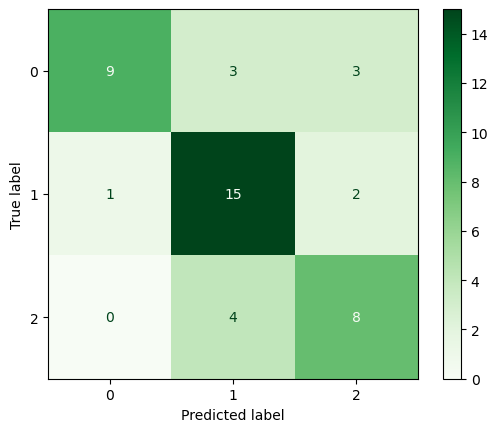

In [26]:
disp.plot(cmap="Greens")
plt.grid(False)
plt.show()

##### Classification Report

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test_wine, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.68      0.83      0.75        18
           2       0.62      0.67      0.64        12

    accuracy                           0.71        45
   macro avg       0.73      0.70      0.70        45
weighted avg       0.74      0.71      0.71        45



##### Metrics

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [30]:
print(f"Accuracy: {accuracy_score(y_test_wine, y_pred):.2f}")
print(f"Precision: {precision_score(y_test_wine, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test_wine, y_pred, average='weighted'):.2f}")
print(f"F1: {f1_score(y_test_wine, y_pred, average='weighted'):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test_wine, y_pred_scores, average='weighted', multi_class='ovr'):.2f}")

Accuracy: 0.71
Precision: 0.74
Recall: 0.71
F1: 0.71
ROC AUC: 0.78


##### Roc Curve

In [31]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

In [32]:
label_binarizer = LabelBinarizer().fit(y_train_wine)
y_onehot_test = label_binarizer.transform(y_test_wine)
y_onehot_test.shape  # (n_samples, n_classes)

(45, 3)

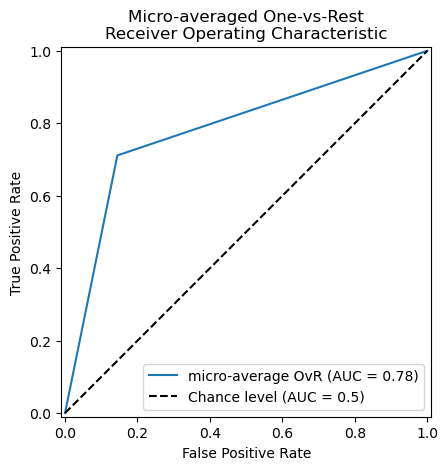

In [33]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_pred_scores.ravel(),
    name="micro-average OvR",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### Time Series Binary Classification

In [34]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [35]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="dtw")

In [36]:
knn.fit(X_gunpoint_train, y_gunpoint_train)

KNeighborsTimeSeriesClassifier()

In [37]:
y_pred = knn.predict(X_gunpoint_test)

In [38]:
y_pred_scores = knn.predict_proba(X_gunpoint_test)

#### Evaluation

##### Confusion Matrix

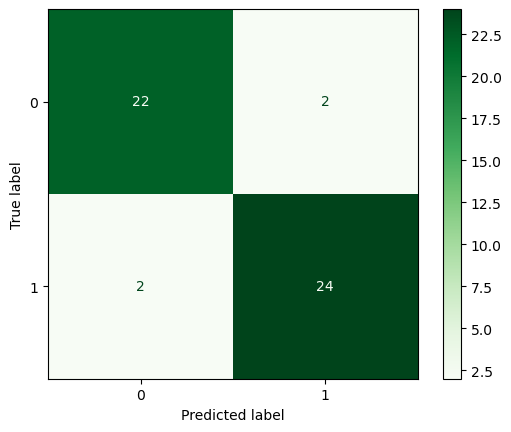

In [39]:
cm = confusion_matrix(y_gunpoint_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_gunpoint))
disp.plot(cmap="Greens")
plt.grid(False)
plt.show()

##### Classification Report

In [40]:
print(classification_report(y_gunpoint_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.92      0.92      0.92        26

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



##### Metrics

In [41]:
print(f"Accuracy: {accuracy_score(y_gunpoint_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_gunpoint_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_gunpoint_test, y_pred, average='weighted'):.2f}")
print(f"F1: {f1_score(y_gunpoint_test, y_pred, average='weighted'):.2f}")
print(f"ROC AUC: {roc_auc_score(y_gunpoint_test, y_pred_scores[:,1], average='weighted', multi_class='ovr'):.2f}")

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1: 0.92
ROC AUC: 0.92


##### Roc Curve

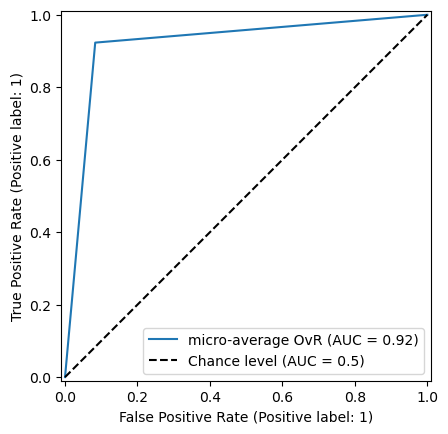

In [42]:
display = RocCurveDisplay.from_predictions(
    y_gunpoint_test.ravel(),
    y_pred_scores[:,1],
    name="micro-average OvR",
    plot_chance_level=True,
)

### Tabular Regression

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor(n_neighbors=1)

In [45]:
knn.fit(X_train_diabetes, y_train_diabetes)

KNeighborsRegressor(n_neighbors=1)

In [46]:
y_pred = knn.predict(X_test_diabetes)

#### Evaluation

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
mape = MeanAbsolutePercentageError()

In [48]:
print(f"Mean Squared Error: {mean_squared_error(y_test_diabetes, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_diabetes, y_pred):.2f}")
print(f"Mean Absolute Percentage Error: {mape(y_test_diabetes, y_pred):.2f}")
print(f"R2: {r2_score(y_test_diabetes, y_pred):.2f}")


Mean Squared Error: 7719.41
Mean Absolute Error: 64.91
Mean Absolute Percentage Error: 0.50
R2: -0.55


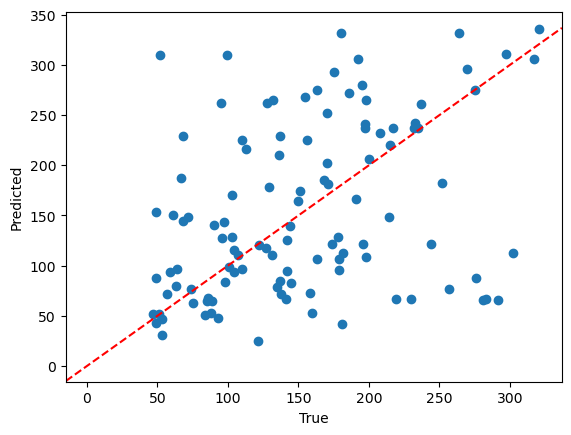

In [49]:
plt.scatter(y_test_diabetes, y_pred)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.gca().axline((1, 1), slope=1, color="red", linestyle="--")
plt.show()

### Time Series Regression

In [50]:
from sktime.regression.distance_based import KNeighborsTimeSeriesRegressor

In [51]:
knn = KNeighborsTimeSeriesRegressor(n_neighbors=1, distance="dtw")

In [52]:
knn.fit(X_train_covid, y_train_covid)

KNeighborsTimeSeriesRegressor()

In [53]:
y_pred = knn.predict(X_test_covid)

#### Evaluation

In [54]:
print(f"Mean Squared Error: {mean_squared_error(y_test_covid, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_covid, y_pred):.3f}")
print(f"Mean Absolute Percentage Error: {mape(y_test_covid, y_pred):.2f}")
print(f"R2: {r2_score(y_test_covid, y_pred):.2f}")

Mean Squared Error: 0.003
Mean Absolute Error: 0.039
Mean Absolute Percentage Error: 48473031006164.53
R2: -1.12


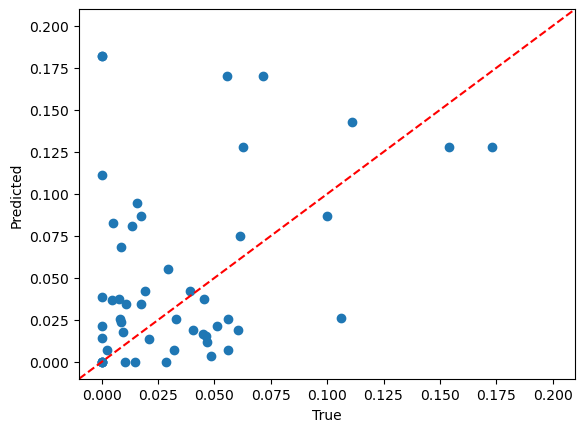

In [55]:
plt.scatter(y_test_covid, y_pred)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.gca().axline((0.2, 0.2), slope=1, color="red", linestyle="--")
plt.show()

##### Manual hyperparameter tuning with Holdout

In [56]:
X_train_covid_train, X_train_covid_val, y_train_covid_train, y_train_covid_val = train_test_split(X_train_covid, y_train_covid, random_state=0)

In [57]:
mses = []
for n_neighbors in [1, 3, 5, 7, 9, 11]:
    knn = KNeighborsTimeSeriesRegressor(n_neighbors=n_neighbors, distance="dtw")
    knn.fit(X_train_covid_train, y_train_covid_train)
    y_pred_ = knn.predict(X_train_covid_val)
    mses.append(mean_squared_error(y_train_covid_val, y_pred_))

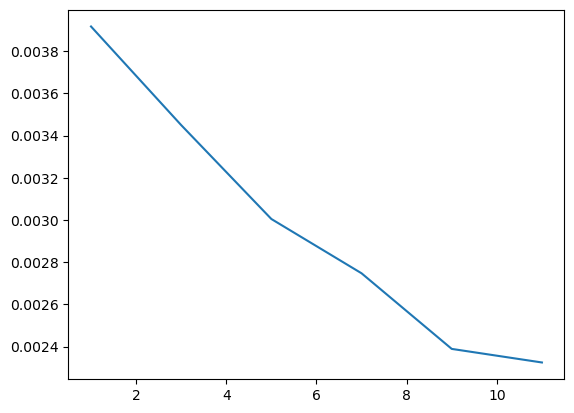

In [58]:
plt.plot([1, 3, 5, 7, 9, 11], mses)

In [59]:
knn = KNeighborsTimeSeriesRegressor(n_neighbors=11, distance="dtw")

In [60]:
knn.fit(X_train_covid, y_train_covid)

KNeighborsTimeSeriesRegressor(n_neighbors=11)

In [61]:
y_pred_holdout = knn.predict(X_test_covid)

In [62]:
print(f"Mean Squared Error: {mean_squared_error(y_test_covid, y_pred_holdout):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_covid, y_pred_holdout):.3f}")
print(f"Mean Absolute Percentage Error: {mape(y_test_covid, y_pred_holdout):.2f}")
print(f"R2: {r2_score(y_test_covid, y_pred_holdout):.2f}")


Mean Squared Error: 0.001
Mean Absolute Error: 0.028
Mean Absolute Percentage Error: 38485496112843.20
R2: 0.16


##### Hyperparameter tuning with GridSearchCV (grid search cross-validation)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [64]:
grid = GridSearchCV(
    estimator=KNeighborsTimeSeriesRegressor(distance="dtw"),
    param_grid={"n_neighbors": [1, 3, 5, 7, 9, 11], "distance": ["dtw", "euclidean"]},
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    scoring="neg_mean_squared_error",
    n_jobs=1,
)

In [65]:
%%time
grid.fit(X_train_covid, y_train_covid)

CPU times: user 2.46 s, sys: 12.1 ms, total: 2.47 s
Wall time: 2.38 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsTimeSeriesRegressor(), n_jobs=1,
             param_grid={'distance': ['dtw', 'euclidean'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error')

In [66]:
grid.best_params_

{'distance': 'dtw', 'n_neighbors': 9}

In [67]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_distance,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000726,0.000151,0.076213,0.002548,dtw,1,"{'distance': 'dtw', 'n_neighbors': 1}",-0.004026,-0.003389,-0.003162,-0.003544,-0.001872,-0.003199,0.000721,12
1,0.000624,0.000009,0.074628,0.000078,dtw,3,"{'distance': 'dtw', 'n_neighbors': 3}",-0.003388,-0.001787,-0.001891,-0.002032,-0.002111,-0.002242,0.000584,9
2,0.000643,0.000010,0.074746,0.000133,dtw,5,"{'distance': 'dtw', 'n_neighbors': 5}",-0.003110,-0.001391,-0.001462,-0.002225,-0.001970,-0.002032,0.000623,7
3,0.000649,0.000017,0.076224,0.000454,dtw,7,"{'distance': 'dtw', 'n_neighbors': 7}",-0.003140,-0.001479,-0.001422,-0.001810,-0.001901,-0.001950,0.000623,5
4,0.000618,0.000009,0.075301,0.000942,dtw,9,"{'distance': 'dtw', 'n_neighbors': 9}",-0.002616,-0.001405,-0.001624,-0.001470,-0.001653,-0.001754,0.000441,1
5,0.000639,0.000020,0.074553,0.000292,dtw,11,"{'distance': 'dtw', 'n_neighbors': 11}",-0.002558,-0.001414,-0.001721,-0.001636,-0.001717,-0.001809,0.000391,2
6,0.000648,0.000034,0.007479,0.012304,euclidean,1,"{'distance': 'euclidean', 'n_neighbors': 1}",-0.003786,-0.002757,-0.003418,-0.003247,-0.002157,-0.003073,0.000565,11
7,0.000610,0.000005,0.001337,0.000005,euclidean,3,"{'distance': 'euclidean', 'n_neighbors': 3}",-0.003374,-0.001961,-0.002363,-0.002488,-0.001749,-0.002387,0.000561,10
8,0.000608,0.000004,0.001318,0.000004,euclidean,5,"{'distance': 'euclidean', 'n_neighbors': 5}",-0.003288,-0.001768,-0.001882,-0.002577,-0.001265,-0.002156,0.000704,8
9,0.000606,0.000004,0.001321,0.000011,euclidean,7,"{'distance': 'euclidean', 'n_neighbors': 7}",-0.002861,-0.001620,-0.001843,-0.002208,-0.001228,-0.001952,0.000555,6


In [68]:
y_pred_tuned = grid.predict(X_test_covid)

In [69]:
print(f"Mean Squared Error: {mean_squared_error(y_test_covid, y_pred_tuned):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_covid, y_pred_tuned):.3f}")
print(f"Mean Absolute Percentage Error: {mape(y_test_covid, y_pred_tuned):.2f}")
print(f"R2: {r2_score(y_test_covid, y_pred_tuned):.2f}")

Mean Squared Error: 0.001
Mean Absolute Error: 0.029
Mean Absolute Percentage Error: 39931998780419.97
R2: 0.07


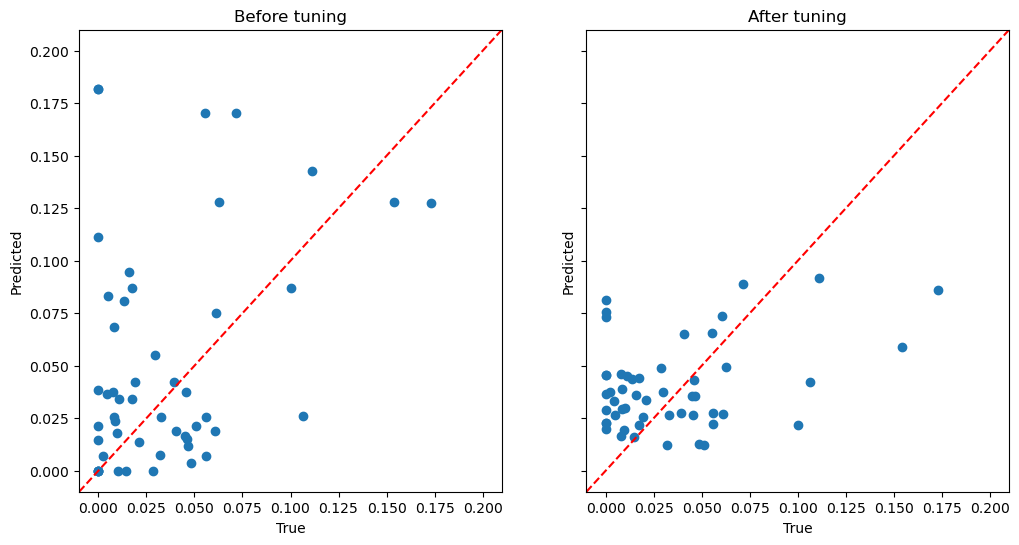

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
axs[0].scatter(y_test_covid, y_pred)
axs[0].set_xlabel("True")
axs[0].set_ylabel("Predicted")
axs[0].axline((0.2, 0.2), slope=1, color="red", linestyle="--")
axs[0].set_title("Before tuning")
axs[1].scatter(y_test_covid, y_pred_tuned)
axs[1].set_xlabel("True")
axs[1].set_ylabel("Predicted")
axs[1].axline((0.2, 0.2), slope=1, color="red", linestyle="--")
axs[1].set_title("After tuning")

plt.show()

## Linear Models (Tabular and Time Series)

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Tabular Regression

#### Linear Regression

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X_train_diabetes, y_train_diabetes)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test_diabetes)

In [75]:
print(f"Mean Squared Error: {mean_squared_error(y_test_diabetes, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_diabetes, y_pred):.3f}")
print(f"Mean Absolute Percentage Error: {mape(y_test_diabetes, y_pred):.2f}")
print(f"R2: {r2_score(y_test_diabetes, y_pred):.2f}")


Mean Squared Error: 3180.160
Mean Absolute Error: 45.121
Mean Absolute Percentage Error: 0.38
R2: 0.36


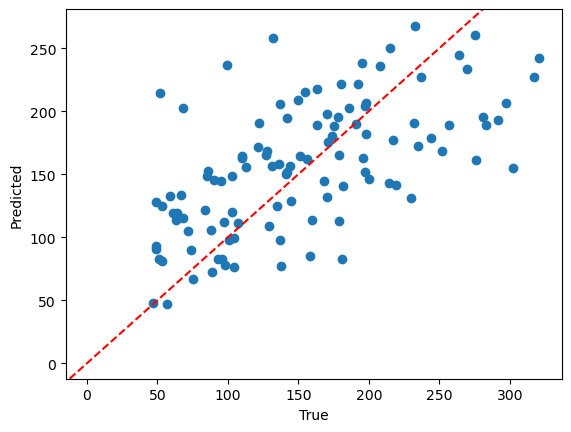

In [76]:
plt.scatter(y_test_diabetes, y_pred)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.gca().axline((1, 1), slope=1, color="red", linestyle="--")
plt.show()

#### Ridge Regression

In [77]:
ridge = Ridge()

In [78]:
ridge.fit(X_train_diabetes, y_train_diabetes)

Ridge()

In [79]:
y_pred = ridge.predict(X_test_diabetes)

In [80]:
print(f"Mean Squared Error: {mean_squared_error(y_test_diabetes, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_diabetes, y_pred):.3f}")
print(f"Mean Absolute Percentage Error: {mape(y_test_diabetes, y_pred):.2f}")
print(f"R2: {r2_score(y_test_diabetes, y_pred):.2f}")


Mean Squared Error: 3192.318
Mean Absolute Error: 44.923
Mean Absolute Percentage Error: 0.39
R2: 0.36


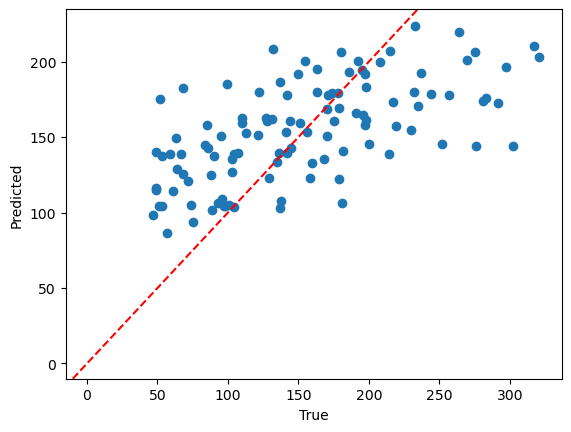

In [81]:
plt.scatter(y_test_diabetes, y_pred)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.gca().axline((1, 1), slope=1, color="red", linestyle="--")
plt.show()

#### Lasso Regression

In [82]:
lasso = Lasso()

In [83]:
lasso.fit(X_train_diabetes, y_train_diabetes)

Lasso()

In [84]:
y_pred = lasso.predict(X_test_diabetes)

In [85]:
print(f"Mean Squared Error: {mean_squared_error(y_test_diabetes, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_diabetes, y_pred):.3f}")
print(f"Mean Absolute Percentage Error: {mape(y_test_diabetes, y_pred):.2f}")
print(f"R2: {r2_score(y_test_diabetes, y_pred):.2f}")

Mean Squared Error: 3583.409
Mean Absolute Error: 48.346
Mean Absolute Percentage Error: 0.43
R2: 0.28


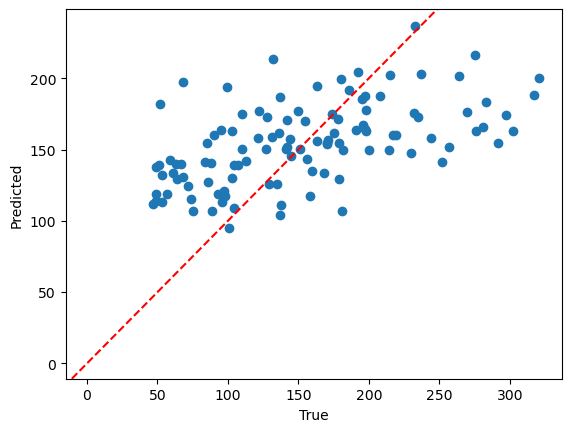

In [86]:
plt.scatter(y_test_diabetes, y_pred)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.gca().axline((1, 1), slope=1, color="red", linestyle="--")
plt.show()

### Time Series Regression

In [87]:
from sktime.transformations.panel.reduce import Tabularizer

In [88]:
# convert time series to tabular
reg = Tabularizer() * Ridge()

In [89]:
reg.fit(X_train_covid, y_train_covid)

SklearnRegressorPipeline(regressor=Ridge(), transformers=[Tabularizer()])

In [90]:
y_pred = reg.predict(X_test_covid)

In [91]:
print(f"Mean Squared Error: {mean_squared_error(y_test_covid, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_covid, y_pred):.3f}")
print(f"Mean Absolute Percentage Error: {mape(y_test_covid, y_pred):.2f}")
print(f"R2: {r2_score(y_test_covid, y_pred):.2f}")

Mean Squared Error: 0.141
Mean Absolute Error: 0.112
Mean Absolute Percentage Error: 32247608378075.56
R2: -93.27


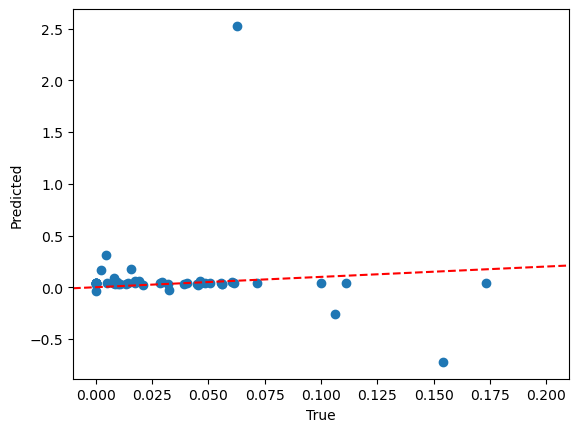

In [92]:
plt.scatter(y_test_covid, y_pred)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.gca().axline((0.2, 0.2), slope=1, color="red", linestyle="--")
plt.show()


### Tabular Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression()

In [95]:
lr.fit(X_train_wine, y_train_wine)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
y_pred = lr.predict(X_test_wine)

In [97]:
lr.score(X_test_wine, y_test_wine)

0.9333333333333333

### Time Series Logistic Regression

In [98]:
from sktime.transformations.panel.reduce import Tabularizer

In [99]:
# convert time series to tabular
clf = Tabularizer() * LogisticRegression()

In [100]:
clf.fit(X_gunpoint_train, y_gunpoint_train)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SklearnClassifierPipeline(classifier=LogisticRegression(),
                          transformers=[Tabularizer()])

In [101]:
clf.score(X_gunpoint_test, y_gunpoint_test)

0.98

## Tree-based (Tabular and Time Series)
Here we use only time series data. For tabular data, you can use the same code as in the previous section.

### Decision Trees

#### Classification

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt = Tabularizer() * DecisionTreeClassifier()

In [104]:
dt.fit(X_gunpoint_train, y_gunpoint_train)

SklearnClassifierPipeline(classifier=DecisionTreeClassifier(),
                          transformers=[Tabularizer()])

In [105]:
dt.score(X_gunpoint_test, y_gunpoint_test)

0.98

In [106]:
# this is equivalent (and uses only sklearn)
dt = DecisionTreeClassifier()
dt.fit(X_gunpoint_train[:, 0, :], y_gunpoint_train)
dt.score(X_gunpoint_test[:, 0, :], y_gunpoint_test)

0.96

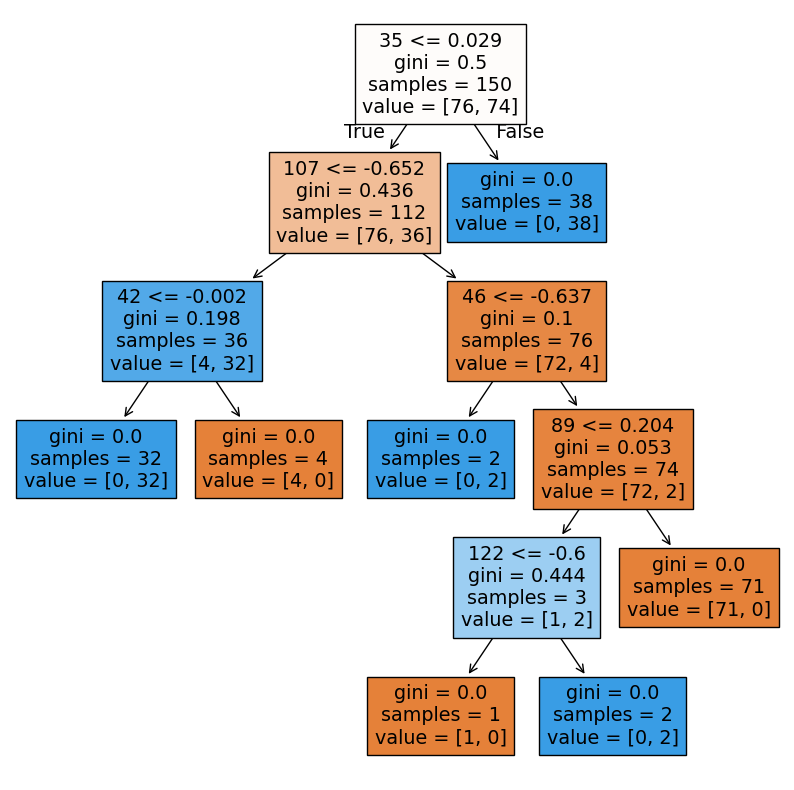

In [107]:
# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(dt, filled=True, feature_names=range(X_gunpoint.shape[2]))
plt.show()

#### Regression

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
dt = Tabularizer() * DecisionTreeRegressor(random_state=0)

In [110]:
dt.fit(X_train_covid, y_train_covid)

SklearnRegressorPipeline(regressor=DecisionTreeRegressor(random_state=0),
                         transformers=[Tabularizer()])

In [111]:
dt.score(X_test_covid, y_test_covid)

-0.7867593609472723

In [112]:
# this is equivalent (and uses only sklearn)
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_covid[:, 0, :], y_train_covid)
dt.score(X_test_covid[:, 0, :], y_test_covid)

-0.7867593609472723

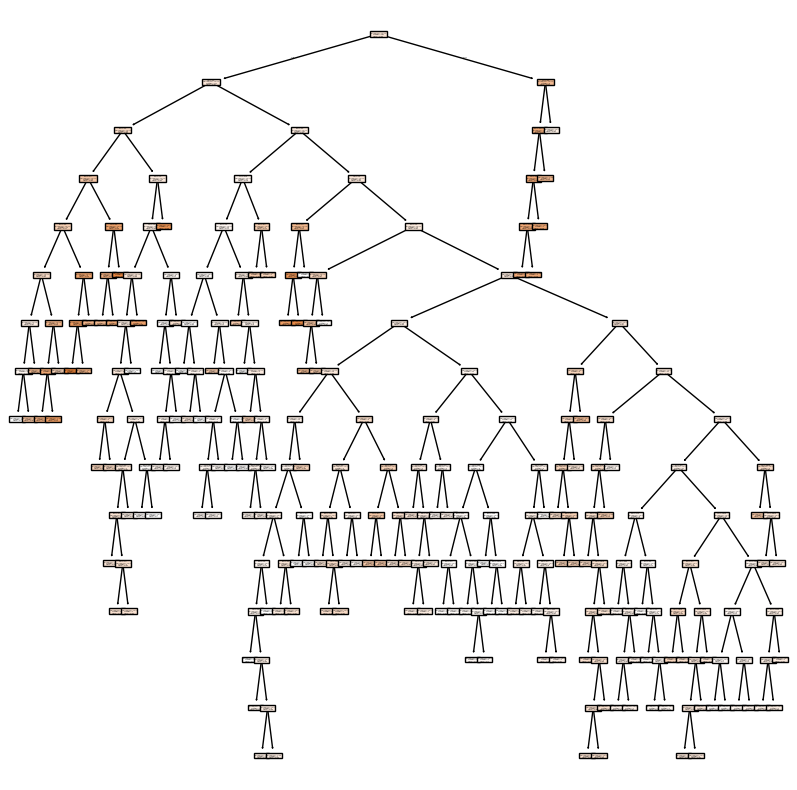

In [113]:
# plot the tree
plt.figure(figsize=(10, 10))
plot_tree(dt, filled=True, feature_names=range(X_covid.shape[2]))
plt.show()

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = Tabularizer() * RandomForestClassifier(random_state=0)

In [116]:
rf.fit(X_gunpoint_train, y_gunpoint_train)

SklearnClassifierPipeline(classifier=RandomForestClassifier(random_state=0),
                          transformers=[Tabularizer()])

In [117]:
rf.score(X_gunpoint_test, y_gunpoint_test)

0.98

### AdaBoost

In [118]:
from sklearn.ensemble import AdaBoostClassifier

In [119]:
ab = Tabularizer() * AdaBoostClassifier(random_state=0)

In [120]:
ab.fit(X_gunpoint_train, y_gunpoint_train)

SklearnClassifierPipeline(classifier=AdaBoostClassifier(random_state=0),
                          transformers=[Tabularizer()])

In [121]:
ab.score(X_gunpoint_test, y_gunpoint_test)

0.94

### LightGBM

In [122]:
#!pip install lightgbm

In [124]:
from lightgbm import LGBMClassifier

In [125]:
lgbm = Tabularizer() * LGBMClassifier(random_state=0, n_jobs=1)

In [126]:
lgbm.fit(X_gunpoint_train, y_gunpoint_train)

[LightGBM] [Info] Number of positive: 74, number of negative: 76
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7716
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

SklearnClassifierPipeline(classifier=LGBMClassifier(n_jobs=1, random_state=0),
                          transformers=[Tabularizer()])

In [127]:
lgbm.score(X_gunpoint_test, y_gunpoint_test)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.96

### XGBoost

In [ ]:
# !pip install xgboost

same as before, you get the idea

### Proximity Forest (only time series)

In [128]:
from sktime.classification.distance_based import ProximityForest

In [129]:
pf = ProximityForest(n_estimators=5, random_state=0, distance_measure="euclidean", n_jobs=1)

In [130]:
# %%time
# # VERY, VERY SLOW
# pf.fit(X_gunpoint_train, y_gunpoint_train)

In [131]:
# pf.score(X_gunpoint_test, y_gunpoint_test)

## Interval-based (only time series)

### Time Series Forest

#### Classifier

In [132]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [133]:
tsf = TimeSeriesForestClassifier()

In [134]:
tsf.fit(X_gunpoint_train, y_gunpoint_train)

TimeSeriesForestClassifier()

In [135]:
tsf.score(X_gunpoint_test, y_gunpoint_test)

1.0

#### Regressor

In [136]:
from sktime.regression.interval_based import TimeSeriesForestRegressor

In [137]:
tsf = TimeSeriesForestRegressor()

In [138]:
tsf.fit(X_train_covid, y_train_covid)

TimeSeriesForestRegressor()

In [139]:
tsf.score(X_test_covid, y_test_covid)

0.3246005053436757

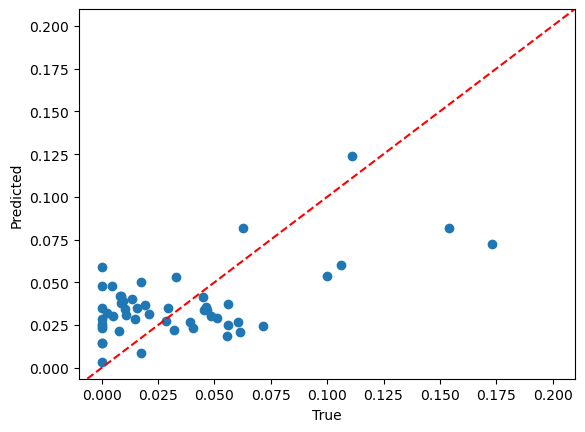

In [140]:
plt.scatter(y_test_covid, tsf.predict(X_test_covid))
plt.xlabel("True")
plt.ylabel("Predicted")
plt.gca().axline((0.2, 0.2), slope=1, color="red", linestyle="--")
plt.show()


### Canonical Interval Forest

In [141]:
from sktime.classification.interval_based import CanonicalIntervalForest

In [142]:
cif = CanonicalIntervalForest(n_estimators=10)

In [143]:
%%time
cif.fit(X_gunpoint_train, y_gunpoint_train)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/transformations/panel/catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/transformations/panel/catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/transformations/panel/catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/transformations/panel/catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/opt/miniconda3/envs

CPU times: user 8.92 s, sys: 306 ms, total: 9.23 s
Wall time: 9.2 s


/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CanonicalIntervalForest(n_estimators=10)

In [144]:
cif.score(X_gunpoint_test, y_gunpoint_test)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/transformations/panel/catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


1.0

### Diverse Representation Canonical Interval Forest

In [145]:
from sktime.classification.interval_based import DrCIF

In [146]:
drcif = DrCIF(n_estimators=5)

In [147]:
%%time
drcif.fit(X_gunpoint_train, y_gunpoint_train)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/transformations/panel/catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/transformations/panel/catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6

CPU times: user 3.54 s, sys: 73.7 ms, total: 3.61 s
Wall time: 3.57 s


/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


DrCIF(n_estimators=5)

In [148]:
drcif.score(X_gunpoint_test, y_gunpoint_test)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/transformations/panel/catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


1.0

## Shapelets (only time series)

### Random

In [149]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

In [150]:
st = ShapeletTransformClassifier(n_shapelet_samples=1000)

In [151]:
st.fit(X_gunpoint_train, y_gunpoint_train)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ShapeletTransformClassifier(n_shapelet_samples=1000)

In [152]:
st.score(X_gunpoint_test, y_gunpoint_test)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1.0

### Gradient-based

In [153]:
#!pip install pyts

In [154]:
from sktime.classification.shapelet_based import ShapeletLearningClassifierPyts

In [155]:
sl = ShapeletLearningClassifierPyts(n_shapelets_per_size=0.05)

In [156]:
%%time
sl.fit(X_gunpoint_train, y_gunpoint_train)

CPU times: user 12.1 s, sys: 2.79 s, total: 14.9 s
Wall time: 13.6 s


ShapeletLearningClassifierPyts(n_shapelets_per_size=0.05)

In [157]:
sl.score(X_gunpoint_test, y_gunpoint_test)

0.74

## Dictionary-based (only time series)

### BOSS

In [158]:
from sktime.classification.dictionary_based import IndividualBOSS, BOSSEnsemble

In [159]:
boss = IndividualBOSS()

In [160]:
boss.fit(X_gunpoint_train, y_gunpoint_train)

IndividualBOSS()

In [161]:
boss.score(X_gunpoint_test, y_gunpoint_test)

0.86

In [162]:
ensemble = BOSSEnsemble()

In [163]:
%%time
ensemble.fit(X_gunpoint_train, y_gunpoint_train)

CPU times: user 10.5 s, sys: 297 ms, total: 10.8 s
Wall time: 10.9 s


BOSSEnsemble()

In [164]:
ensemble.score(X_gunpoint_test, y_gunpoint_test)

1.0

### MrSEQL/MrSQM 

In [165]:
# this require cython and sometimes they don't install properly
# !pip install mrseql
# !pip install mrsqm

In [166]:
# from sktime.classification.shapelet_based import MrSEQL, MrSQM

In [167]:
# mrseql = MrSEQL()
# mrseql.fit(X_gunpoint_train, y_gunpoint_train)
# mrseql.score(X_gunpoint_test, y_gunpoint_test)

In [168]:
# mrsqm = MrSQM()
# mrsqm.fit(X_gunpoint_train, y_gunpoint_train)
# mrsqm.score(X_gunpoint_test, y_gunpoint_test)

### WEASEL

In [169]:
from sktime.classification.dictionary_based import WEASEL

In [170]:
weasel = WEASEL()

In [171]:
weasel.fit(X_gunpoint_train, y_gunpoint_train)

WEASEL()

In [172]:
weasel.score(X_gunpoint_test, y_gunpoint_test)

1.0

### Muse (also works on multivariate data)

In [173]:
from sktime.datasets import load_basic_motions

In [174]:
X_train, y_train = load_basic_motions(split="train", return_X_y=True, return_type="numpy3D")
X_test, y_test = load_basic_motions(split="test", return_X_y=True, return_type="numpy3D")
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40, 6, 100), (40,), (40, 6, 100), (40,))

In [175]:
from sktime.classification.dictionary_based import MUSE

In [176]:
muse = MUSE()

In [177]:
muse.fit(X_train, y_train)

MUSE()

In [178]:
muse.score(X_test, y_test)

1.0